In [215]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, MaxAbsScaler
from sklearn.cluster import DBSCAN

%matplotlib inline

In [216]:
days = np.arange(60)
prices1 = np.random.normal(0, 35, size=20) + 400
prices2 = np.random.normal(0, 35, size=20) + 800
prices3 = np.random.normal(0, 35, size=20) + 400

In [217]:
prices = np.concatenate([prices1, prices2, prices3], axis=0)

In [218]:
print prices.shape
days.shape

(60,)


(60,)

In [219]:
X = np.concatenate([days[:, None], prices[:, None]], axis=1)

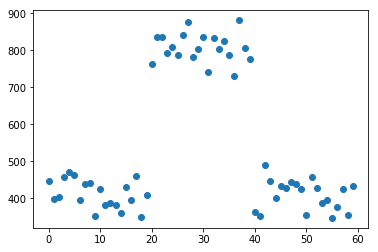

In [220]:
plt.scatter(days, prices)

836.731749962


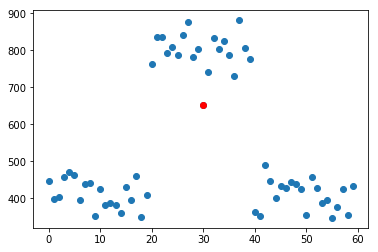

In [221]:
# create a test point
print prices[30]
prices[30] = 652

plt.scatter(days, prices)
plt.plot(30, 652, 'or')

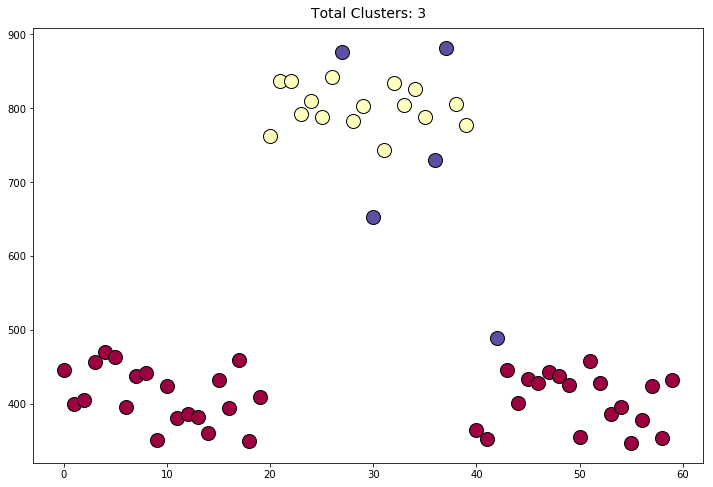

In [443]:
# run dbscan
X = np.concatenate([days[:, None], prices[:, None]], axis=1)
db = DBSCAN(eps=30, min_samples=5).fit(X)

# shamelessly copied code below ;)
labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
 
plt.subplots(figsize=(12,8))
 
for k, c in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=c,
            markeredgecolor='k', markersize=14)
 
plt.title("Total Clusters: {}".format(clusters), fontsize=14,
        y=1.01)

In [223]:
from scipy.spatial.distance import euclidean, chebyshev, cityblock

# get the distances to each clusters
labels = db.labels_
lbls = np.unique(db.labels_)
print "Cluster labels: {}".format(np.unique(lbls))

cluster_means = [np.mean(X[labels==num, :], axis=0) for num in range(lbls[-1] + 1)]
print "Cluster Means: {}".format(cluster_means)

noise_point = X[30, :]

# euclidean
dist = [euclidean(noise_point, cm) for cm in cluster_means]
print "Euclidean distance: {}".format(dist)

# chebyshev
dist = [chebyshev(noise_point, cm) for cm in cluster_means]
print "Chebysev distance: {}".format(dist)

# cityblock
dist = [cityblock(noise_point, cm) for cm in cluster_means]
print "Cityblock (Manhattan) distance: {}".format(dist)

Cluster labels: [-1  0  1]
Cluster Means: [array([  29.17948718,  408.27183589]), array([  28.75      ,  801.73792225])]
Euclidean distance: [243.7295452351747, 149.74313960931087]
Chebysev distance: [243.72816410759026, 149.73792225102352]
Cityblock (Manhattan) distance: [244.54867692810308, 150.98792225102352]


### Notice that the mean of Cluster 0 (the red points) is in between the two clusters

In [447]:
# let's create some helper functions
def calculate_cluster_means(X, labels, quiet=False):
    lbls = np.unique(labels)

    cluster_means = [np.mean(X[labels==num, :], axis=0) for num in lbls if num != -1]
    
    if not quiet:
        print "Cluster labels: {}".format(np.unique(lbls))
        print "Cluster Means: {}".format(cluster_means)
    
    return cluster_means
    
def print_3_distances(noise_point, cluster_means):
    # euclidean
    dist = [euclidean(noise_point, cm) for cm in cluster_means]
    print "Euclidean distance: {}".format(dist)

    # chebyshev
    dist = [chebyshev(noise_point, cm) for cm in cluster_means]
    print "Chebysev distance: {}".format(dist)

    # cityblock
    dist = [cityblock(noise_point, cm) for cm in cluster_means]
    print "Cityblock (Manhattan) distance: {}".format(dist)
    
def plot_the_clusters(X, dbscan_model, noise_point=None, set_size=True, 
                      markersize=14):
    labels = dbscan_model.labels_
    clusters = len(set(labels))
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

    if set_size:
        plt.subplots(figsize=(12,8))

    for k, c in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=c,
                markeredgecolor='k', markersize=markersize)
        
    if noise_point is not None:
        plt.plot(noise_point[0], noise_point[1], 'xr', markersize=markersize+3)

    plt.title("Total Clusters: {}".format(clusters), fontsize=14, y=1.01)
    
    return colors, unique_labels
    
def do_yo_thang(X, dbscan_model, noise_point):
    cluster_means = calculate_cluster_means(X, dbscan_model.labels_)
    print_3_distances(noise_point, cluster_means)
    return plot_the_clusters(X, dbscan_model, noise_point)

Cluster labels: [-1  0  1  2]
Cluster Means: [array([-1.15486095, -0.67952133]), array([-0.00151955,  1.41798051]), array([ 1.15486095, -0.69745211])]
Euclidean distance: [1.741514276430483, 0.8207044030536206, 1.7162841336829602]
Chebysev distance: [1.277360330207753, 0.82014151193375917, 1.2952911048758251]
Cityblock (Manhattan) distance: [2.4610928007528203, 0.85053258948305488, 2.4212805280772303]


(array([[ 0.61960784,  0.00392157,  0.25882353,  1.        ],
        [ 0.99346405,  0.74771242,  0.43529412,  1.        ],
        [ 0.74771242,  0.89803922,  0.62745098,  1.        ],
        [ 0.36862745,  0.30980392,  0.63529412,  1.        ]]), {-1, 0, 1, 2})

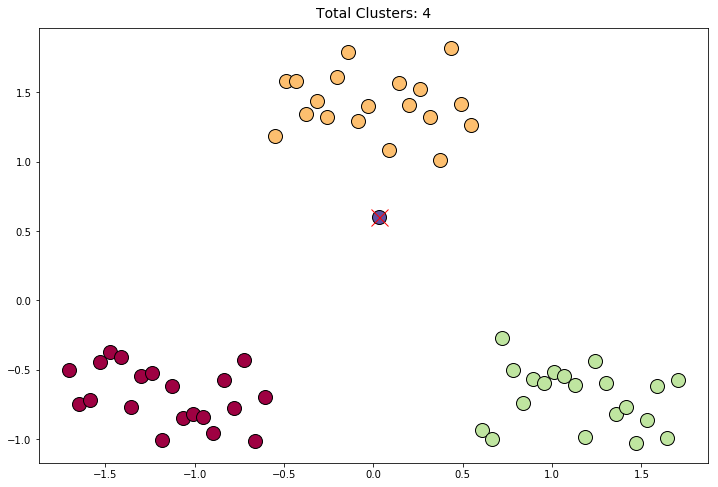

In [448]:
# Let's start playing with scalings
# First we'll do what he did in the book this will have the effect of
# weighting each feature about equally for euclidean distance

X_ss = StandardScaler().fit_transform(X)
db_ss = DBSCAN(eps=0.4, min_samples=3).fit(X_ss)
noise_point = X_ss[30, :]
do_yo_thang(X_ss, db_ss, noise_point)

Cluster labels: [-1  0  1  2  3]
Cluster Means: [array([-1.12598942, -0.69267799]), array([-0.04245812,  1.26570255]), array([ 1.05047928, -0.32088563]), array([ 1.46282387, -1.15164662])]
Euclidean distance: [1.267397591020491, 1.4380464157963275, 1.0326064493198477, 1.7374473543277622]
Chebysev distance: [1.154860946873236, 1.436276288004386, 1.0216077606955551, 1.4339523423676017]
Cityblock (Manhattan) distance: [1.6769651961487968, 1.5076059347230271, 1.1719196446687015, 2.4150252188039087]


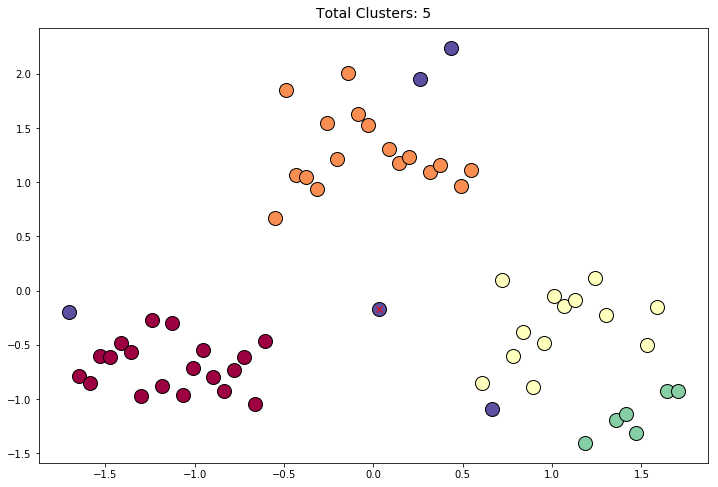

In [226]:
# Let's make it a little harder now
noisy_prices = prices + np.random.uniform(-100, 100, 60)
noisy_prices[30] = 500
X = np.concatenate([days[:, None], noisy_prices[:, None]], axis=1)

X_ss = StandardScaler().fit_transform(X)
db_ss = DBSCAN(eps=0.4, min_samples=5).fit(X_ss)
noise_point = X_ss[30, :]
do_yo_thang(X_ss, db_ss, noise_point)

## test some different scalings

Cluster labels: [-1  0  1  2  3]
Cluster Means: [array([-2.71186441, -0.66809164]), array([-0.03389831,  1.22942135]), array([ 2.1920904 , -0.38350294]), array([ 3.64745763, -0.96180696])]
Euclidean distance: [2.823834171898398, 1.4036837683675392, 2.1349386247254993, 3.666063692129182]
Chebysev distance: [2.7796610169491514, 1.3999950949163817, 2.1242937853107344, 3.579661016949153]
Cityblock (Manhattan) distance: [3.2771789173651262, 1.501690010170619, 2.3372229872417942, 4.370894230662028]


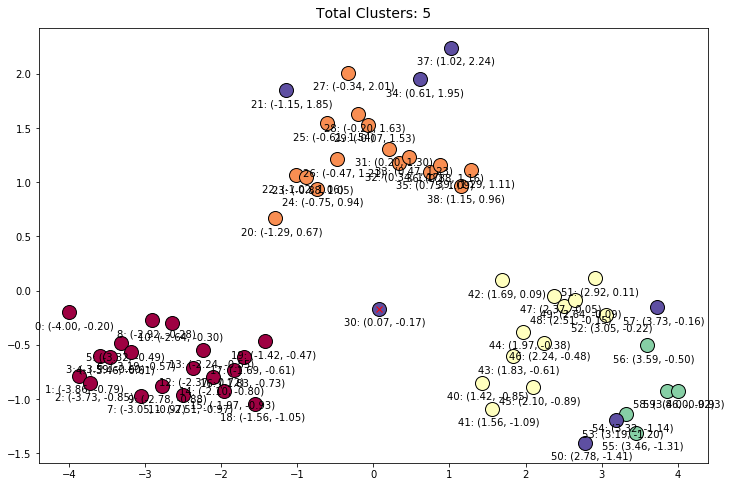

In [227]:
# add another helper fxn
def makeX(days, prices):
    return np.concatenate([days, prices], axis=1)

prices_ss = StandardScaler().fit_transform(noisy_prices[:, None])
prices_rob = RobustScaler().fit_transform(noisy_prices[:, None])

days_mm4 = MinMaxScaler(feature_range=(-4,4)).fit_transform(days[:, None])

X_ssmm4 = makeX(days_mm4, prices_ss)
db = DBSCAN(eps=0.6, min_samples=5).fit(X_ssmm4)
# show with X_ss again

noise_point = X_ssmm4[30, :]
do_yo_thang(X_ssmm4, db, noise_point)
for index, xy in enumerate(zip(days_mm4, prices_ss)):
    plt.annotate('{}: ({:0.2f}, {:0.2f})'.format(index, xy[0][0], xy[1][0]), xytext=(xy[0]-0.45, xy[1]-0.15), xy=xy)

In [232]:
print_3_distances(X_ssmm4[50,:], calculate_cluster_means(X_ssmm4, db.labels_))
print
print_3_distances(X_ssmm4[53, :], calculate_cluster_means(X_ssmm4, db.labels_))

Cluster labels: [-1  0  1  2  3]
Cluster Means: [array([-2.71186441, -0.66809164]), array([-0.03389831,  1.22942135]), array([ 2.1920904 , -0.38350294]), array([ 3.64745763, -0.96180696])]
Euclidean distance: [5.5409881485228345, 3.855620332351869, 1.1799946538440473, 0.975240828011085]
Chebysev distance: [5.4915254237288122, 2.8135593220338979, 1.0233025690806961, 0.86779661016949206]
Cityblock (Manhattan) distance: [6.2302392943245932, 5.4497861879620348, 1.6108731905496225, 1.3127951674683729]

Cluster labels: [-1  0  1  2  3]
Cluster Means: [array([-2.71186441, -0.66809164]), array([-0.03389831,  1.22942135]), array([ 2.1920904 , -0.38350294]), array([ 3.64745763, -0.96180696])]
Euclidean distance: [5.92202638136478, 4.032503219999566, 1.2851104138231195, 0.5178237527116283]
Chebysev distance: [5.8983050847457621, 3.2203389830508478, 0.99435028248587631, 0.46101694915254221]
Cityblock (Manhattan) distance: [6.4278271228543939, 5.6473740164918365, 1.8084610190794232, 0.6968236739642

Cluster labels: [-1  0  1  2  3]
Cluster Means: [array([-2.71186441, -0.17535342]), array([-0.03389831,  0.84272992]), array([ 2.1920904 , -0.02266144]), array([ 3.64745763, -0.33294215])]
Euclidean distance: [2.7924487893959755, 0.758000038405401, 2.1273635800555533, 3.60474608186514]
Chebysev distance: [2.7796610169491514, 0.75114725748951705, 2.1242937853107344, 3.579661016949153]
Cityblock (Manhattan) distance: [3.046597099658586, 0.85284217274375429, 2.238537889915615, 4.0041858318382655]


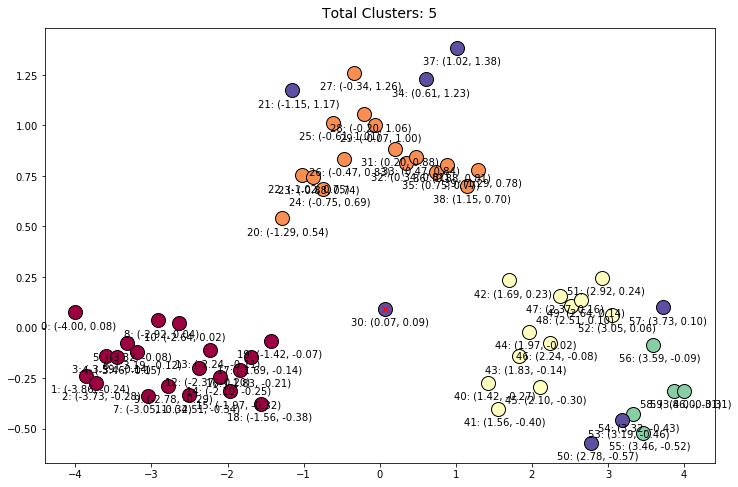

In [229]:
X_rbmm4 = makeX(days_mm4, prices_rob)
db = DBSCAN(eps=0.6, min_samples=5).fit(X_ssmm4)
# show with X_ss again

noise_point = X_rbmm4[30, :]
do_yo_thang(X_rbmm4, db, noise_point)
for index, xy in enumerate(zip(days_mm4, prices_rob)):
    plt.annotate('{}: ({:0.2f}, {:0.2f})'.format(index, xy[0][0], xy[1][0]), xytext=(xy[0]-0.45, xy[1]-0.08), xy=xy)

In [231]:
print_3_distances(X_rbmm4[50,:], calculate_cluster_means(X_ssmm4, db.labels_))
print
print_3_distances(X_rbmm4[53, :], calculate_cluster_means(X_ssmm4, db.labels_))

Cluster labels: [-1  0  1  2  3]
Cluster Means: [array([-2.71186441, -0.66809164]), array([-0.03389831,  1.22942135]), array([ 2.1920904 , -0.38350294]), array([ 3.64745763, -0.96180696])]
Euclidean distance: [5.492371334834001, 3.3406815508047254, 0.6169742835325376, 0.9514486859617728]
Chebysev distance: [5.4915254237288122, 2.8135593220338979, 0.58757062146892647, 0.86779661016949206]
Cityblock (Manhattan) distance: [5.5879173333805818, 4.6146804077144852, 0.77576741030207219, 1.2579038331181613]

Cluster labels: [-1  0  1  2  3]
Cluster Means: [array([-2.71186441, -0.66809164]), array([-0.03389831,  1.22942135]), array([ 2.1920904 , -0.38350294]), array([ 3.64745763, -0.96180696])]
Euclidean distance: [5.901993703494546, 3.6363314336049894, 0.9972472558500916, 0.6818271241567575]
Chebysev distance: [5.8983050847457621, 3.2203389830508478, 0.99435028248587631, 0.50234609566508692]
Cityblock (Manhattan) distance: [6.1069358671139486, 4.9092211960150172, 1.0703081986026044, 0.96336304

Cluster labels: [-1  0  1  2  3  4  5  6]
Cluster Means: [array([-2.79661017, -0.11547444]), array([-1.98305085, -0.91516434]), array([-0.68644068,  0.50451282]), array([ 0.23163842,  1.18478396]), array([ 1.5       , -0.45464303]), array([ 2.08474576, -0.77613305]), array([ 2.59322034, -1.51289712])]
Euclidean distance: [2.8615986607458406, 2.0982231802166984, 1.1666312570821766, 1.594673531019001, 1.450197204103654, 2.0684567497465816, 2.7754409064069625]
Chebysev distance: [2.8474576271186445, 2.0338983050847461, 0.90412095159586503, 1.5843920913560066, 1.4491525423728813, 2.0338983050847457, 2.5423728813559321]
Cityblock (Manhattan) distance: [3.1315913226674965, 2.5494545082014115, 1.6414090871890856, 1.7651830518079838, 1.5041874378871745, 2.4104232181324639, 3.6556618632034295]


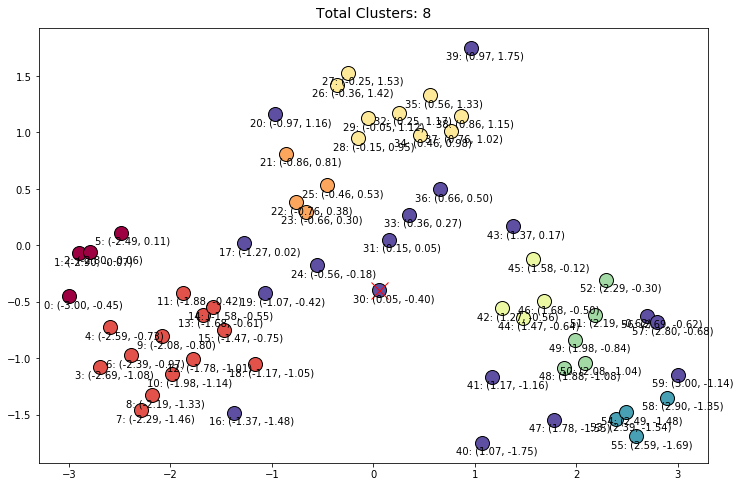

In [470]:
noisy_prices2 = prices + np.random.normal(0, 75, 60)
noisy_prices2[30] = 500

np2_mm175 = MinMaxScaler(feature_range=(-1.75, 1.75)).fit_transform(noisy_prices2[:, None])
d_mm3 = MinMaxScaler(feature_range=(-3,3)).fit_transform(days[:, None])
X2_mm175mm3 = makeX(d_mm3, np2_mm15)

db = DBSCAN(eps=0.45, min_samples=4).fit(X2_mm175mm3)
noise_point = X2_mm175mm3[30, :]
do_yo_thang(X2_mm175mm3, db, noise_point)
for index, xy in enumerate(zip(d_mm3, np2_mm15)):
    plt.annotate('{}: ({:0.2f}, {:0.2f})'.format(index, xy[0][0], xy[1][0]), xytext=(xy[0]-0.25, xy[1]-0.1), xy=xy)
# What do we not want to happen? How can we control epsilon to achieve that?

In [466]:
get_value = lambda x: x[1]

def axes_plot_the_clusters(X, dbscan_model, noise_point, ax, markersize=14):
    labels = dbscan_model.labels_
    clusters = len(set(labels))
    unique_labels = list(set(labels))
    cluster_means = calculate_cluster_means(X, labels, quiet=True)
    
    if -1 not in unique_labels:
        unique_labels = [-1] + unique_labels
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

    for k, c in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        for array in xy:
            x, y = array
            if k == -1 and len(unique_labels) > 1:
                closest_cluster = min(enumerate([euclidean(array, cm) for cm in cluster_means]), key=get_value)[0]
                ax.plot(x, y, 'o', markerfacecolor='none', markeredgecolor=colors[closest_cluster], 
                        mew=3, markersize=markersize)
            else:
                ax.plot(x, y, 'o', markerfacecolor=c, markeredgecolor='k', markersize=markersize)
        
    ax.plot(noise_point[0], noise_point[1], 'xr', markersize=markersize+3)
    
    return colors, unique_labels

In [ ]:
plt.subplots

columns = 5
rows = 25
multiple = 20/columns

fig, subplots = plt.subplots(rows, columns, sharex='col', sharey='row',
                            figsize=(columns*multiple,
                                     rows*multiple
                                    ))
label_fontsize = 18

minPts_range = np.linspace(2, 6, columns)
eps_range = np.linspace(0.1, 0.6, rows)

place = 1
for r_index, e in enumerate(eps_range):
    for c_index, m in enumerate(minPts_range):
        ax = subplots[r_index, c_index]
        db = DBSCAN(eps=e, min_samples=m).fit(X2_mm175mm3)
        num_actual_clusters = len([c for c in np.unique(db.labels_) if c != -1])
        num_outliers = len(X2_mm175mm3[db.labels_ == -1])
        axes_plot_the_clusters(X2_mm175mm3, db, noise_point, ax, markersize=8)
        ax.set_title("Number of Clusters: {}\nOutliers: {}".format(num_actual_clusters, num_outliers), 
                     fontsize=label_fontsize, y=1.01)
        ax.yaxis.set_label_position('right')
        ax.yaxis.labelpad = label_fontsize - 2
        ax.set_ylabel('eps: {:.2f}, minPts: {}'.format(e, int(m)), 
                      fontdict={'fontsize': label_fontsize - 2}, rotation=270)
plt.tight_layout()

In [465]:
%debug

> <ipython-input-463-eebd373ab118>(20)axes_plot_the_clusters()
     18             if k == -1 and len(unique_labels) > 1:
     19                 closest_cluster = min(enumerate([euclidean(array, cm) for cm in cluster_means]), key=get_value)[0]
---> 20                 raise Exception
     21                 ax.plot(x, y, 'o', markerfacecolor='none', markeredgecolor=colors[closest_cluster], 
     22                         mew=3, markersize=markersize)

ipdb> closest_cluster
0
ipdb> cm
array([ 2.74576271, -0.65193717])
ipdb> quit


In [347]:
s = subplots[0,0]
s.get_title()

u''